# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en estructuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader.data as web

In [2]:
# Librerías estándar para arreglos y gráficos
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Primero importaremos datos desde un archivo con extensión `.csv`

In [3]:
#Importar datos de un archivo csv
file_name = "GOOG.csv"
data = pd.read_csv(file_name)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-28,541.513306,547.476929,540.137024,547.397095,547.397095,1270900
1,2014-10-29,548.494080,552.672607,545.482361,547.825928,547.825928,1770500
2,2014-10-30,547.446960,551.286438,542.021851,548.803284,548.803284,1455600
3,2014-10-31,557.818481,558.037903,553.231079,557.549255,557.549255,2035000
4,2014-11-03,553.979065,556.372498,551.715271,553.699829,553.699829,1382200
5,2014-11-04,551.485901,553.979065,547.796021,552.592834,552.592834,1244200
6,2014-11-05,555.275513,555.275513,542.560425,544.425293,544.425293,2032200
7,2014-11-06,544.006409,545.387634,539.488831,540.555908,540.555908,1333200
8,2014-11-07,544.714478,544.714478,537.195129,539.528748,539.528748,1633700
9,2014-11-10,539.977478,548.085205,539.538696,545.990967,545.990967,1134600


Ahora lo haremos desde Yahoo Finance

In [4]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [6]:
closes = web.DataReader(name="GOOG",data_source="yahoo",start="2014-10-28",end="2019-10-28")
closes

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-28,547.476929,540.137024,541.513306,547.397095,1270900.0,547.397095
2014-10-29,552.672607,545.482361,548.494080,547.825928,1770500.0,547.825928
2014-10-30,551.286438,542.021851,547.446960,548.803284,1455600.0,548.803284
2014-10-31,558.037903,553.231079,557.818481,557.549255,2035000.0,557.549255
2014-11-03,556.372498,551.715271,553.979065,553.699829,1382200.0,553.699829
2014-11-04,553.979065,547.796021,551.485901,552.592834,1244200.0,552.592834
2014-11-05,555.275513,542.560425,555.275513,544.425293,2032200.0,544.425293
2014-11-06,545.387634,539.488831,544.006409,540.555908,1333200.0,540.555908
2014-11-07,544.714478,537.195129,544.714478,539.528748,1633700.0,539.528748


In [11]:
# Escribir una función para generalizar la exportación desde Yahoo
def get_close(names,start,end):
    closes = web.DataReader(name=names,data_source="yahoo",start=start,end=end)
    return closes["Adj Close"]   

In [12]:
# Instrumentos a descargar 
names = ["AAPL","AC.MX","BIMBOA.MX","CVX"]

# Fechas: inicios 2013 a finales de 2018
start = "2013-01-01"
end = "2018-12-31"

In [13]:
# Obtenemos los precios ajustados en el cierre
closes = get_close(names,start,end)
closes

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
Date,,,,
2013-01-02,69.057251,86.839508,32.680290,84.932129
2013-01-03,68.185600,85.731514,32.641628,84.570549
2013-01-04,66.286301,85.944252,32.970268,85.016785
2013-01-07,65.896370,86.440636,32.699623,84.439735
2013-01-08,66.073723,86.210175,32.554630,84.062737
2013-01-09,65.041084,85.501053,32.206661,84.278191
2013-01-10,65.847328,84.809685,31.288404,84.993690
2013-01-11,65.443581,85.013557,31.491388,85.963104
2013-01-14,63.110344,82.974854,31.327068,86.824814


¿Cómo lucen estos datos?

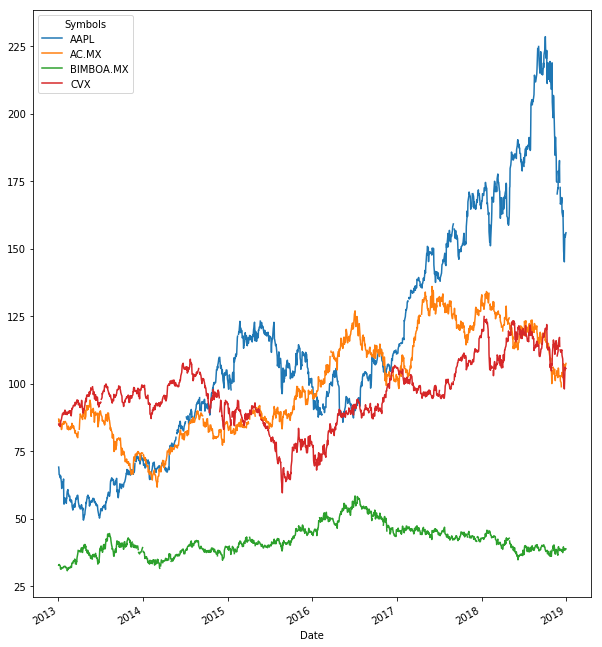

In [17]:
# Graficar
closes.plot(figsize=(10,12));

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [18]:
# Método describe
closes.describe()

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
count,1510.000000,1505.000000,1505.000000,1510.000000
mean,114.358812,99.836232,41.833077,96.167171
std,42.911704,18.935536,5.370176,12.430731
min,49.407326,61.627201,30.660124,59.515778
25%,85.663460,84.601097,38.226109,89.212854
50%,106.252281,97.391678,40.944202,95.494949
75%,147.169033,117.741745,45.026073,104.373226
max,228.523819,135.975967,58.383011,124.832764


## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [19]:
# Método shift
closes.shift()

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,69.057251,86.839508,32.680290,84.932129
2013-01-04,68.185600,85.731514,32.641628,84.570549
2013-01-07,66.286301,85.944252,32.970268,85.016785
2013-01-08,65.896370,86.440636,32.699623,84.439735
2013-01-09,66.073723,86.210175,32.554630,84.062737
2013-01-10,65.041084,85.501053,32.206661,84.278191
2013-01-11,65.847328,84.809685,31.288404,84.993690
2013-01-14,65.443581,85.013557,31.491388,85.963104


In [20]:
# Entonces los rendimientos se calculan como
ret = (closes - closes.shift())/closes.shift()
ret

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,-0.012759,-0.001183,-0.004257
2013-01-04,-0.027855,0.002481,0.010068,0.005276
2013-01-07,-0.005883,0.005776,-0.008209,-0.006787
2013-01-08,0.002691,-0.002666,-0.004434,-0.004465
2013-01-09,-0.015629,-0.008225,-0.010689,0.002563
2013-01-10,0.012396,-0.008086,-0.028511,0.008490
2013-01-11,-0.006132,0.002404,0.006488,0.011406
2013-01-14,-0.035653,-0.023981,-0.005218,0.010024


In [22]:
# Método pct_change
ret = closes.pct_change()
ret = ret.dropna()
ret

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
Date,,,,
2013-01-03,-0.012622,-0.012759,-0.001183,-0.004257
2013-01-04,-0.027855,0.002481,0.010068,0.005276
2013-01-07,-0.005883,0.005776,-0.008209,-0.006787
2013-01-08,0.002691,-0.002666,-0.004434,-0.004465
2013-01-09,-0.015629,-0.008225,-0.010689,0.002563
2013-01-10,0.012396,-0.008086,-0.028511,0.008490
2013-01-11,-0.006132,0.002404,0.006488,0.011406
2013-01-14,-0.035653,-0.023981,-0.005218,0.010024
2013-01-15,-0.031550,0.003312,0.015427,0.005228


y la gráfica de los rendimientos se puede obtener como...

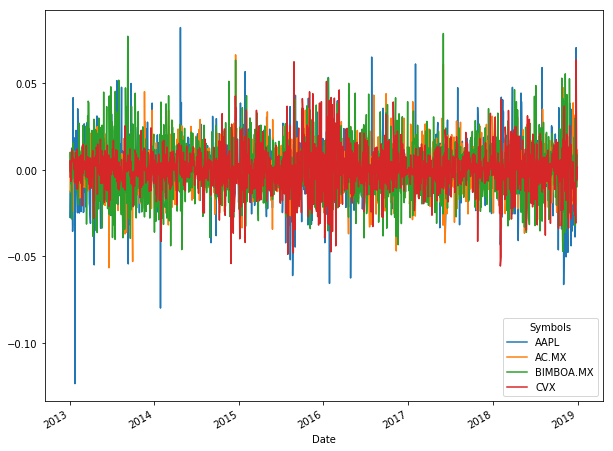

In [24]:
# Gráfica
ret.plot(figsize=(10,8));

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [25]:
# Rendimiento logarítmico
logret = np.log(closes/closes.shift()).dropna()
logret

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
Date,,,,
2013-01-03,-0.012702,-0.012841,-0.001184,-0.004266
2013-01-04,-0.028250,0.002478,0.010018,0.005263
2013-01-07,-0.005900,0.005759,-0.008243,-0.006811
2013-01-08,0.002688,-0.002670,-0.004444,-0.004475
2013-01-09,-0.015752,-0.008260,-0.010746,0.002560
2013-01-10,0.012320,-0.008119,-0.028926,0.008454
2013-01-11,-0.006150,0.002401,0.006467,0.011341
2013-01-14,-0.036304,-0.024273,-0.005232,0.009974
2013-01-15,-0.032058,0.003306,0.015310,0.005215


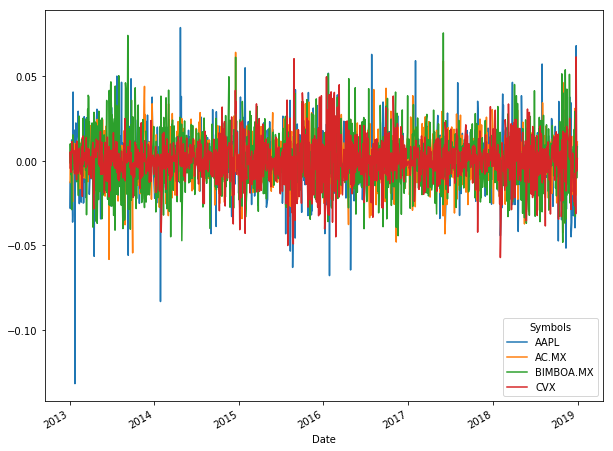

In [27]:
# Gráfica
logret.plot(figsize=(10,8));

In [28]:
# Valor absoluto de la diferencia
np.abs(logret - ret)

Symbols,AAPL,AC.MX,BIMBOA.MX,CVX
Date,,,,
2013-01-03,8.033601e-05,8.209640e-05,7.003394e-07,9.088021e-06
2013-01-04,3.953044e-04,3.073701e-06,5.034592e-05,1.387190e-05
2013-01-07,1.737020e-05,1.661510e-05,3.387742e-05,2.313967e-05
2013-01-08,3.615308e-06,3.560428e-06,9.859701e-06,9.996582e-06
2013-01-09,1.234138e-04,3.401608e-05,5.753529e-05,3.278923e-06
2013-01-10,7.620031e-05,3.286963e-05,4.143444e-04,3.583516e-05
2013-01-11,1.887528e-05,2.884708e-06,2.095332e-05,6.455476e-05
2013-01-14,6.510775e-04,2.922238e-04,1.366096e-05,4.990884e-05
2013-01-15,5.084136e-04,5.471301e-06,1.177925e-04,1.362028e-05


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [29]:
# Media y volatilidad de rendimientos
mu = ret.mean()
mu

Symbols
AAPL         0.000645
AC.MX        0.000219
BIMBOA.MX    0.000239
CVX          0.000224
dtype: float64

In [30]:
sigma = ret.std()
sigma

Symbols
AAPL         0.015377
AC.MX        0.012785
BIMBOA.MX    0.016091
CVX          0.012918
dtype: float64

In [32]:
mu.AAPL, sigma.AAPL

(0.0006446719873386335, 0.015376656121312397)

In [35]:
mu["BIMBOA.MX"], sigma["AAPL"]

(0.0002386925274501643, 0.015376656121312397)

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>